In [1]:
import torch  # PyTorch本体を読み込み
import torch.nn as nn  # ニューラルネットワークモジュール
import torch.nn.functional as F  # 活性化関数などの関数群

# nn.Moduleを継承したクラスでモデルを定義
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()  # 親クラスの初期化

        # 畳み込み層1：入力チャネル3（RGB画像）、出力チャネル16、カーネルサイズ3
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)

        # プーリング層：2×2の最大プーリング（画像サイズを半分にする）
        self.pool = nn.MaxPool2d(2, 2)

        # 畳み込み層2：16チャネルから32チャネルへ
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)

        # 全結合層：32チャネル、175×175サイズの特徴量→出力クラス数2（良品/不良品）
        self.fc1 = nn.Linear(32 * 175 * 175, 2)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))  # conv1→ReLU→pooling
        x = self.pool(F.relu(self.conv2(x)))  # conv2→ReLU→pooling
        x = x.view(-1, 32 * 175 * 175)  # 1次元に展開
        x = self.fc1(x)  # 全結合層を通す
        return x

# モデルのインスタンス作成
model = SimpleCNN()
print(model)


SimpleCNN(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=980000, out_features=2, bias=True)
)


In [5]:
import torch  # PyTorchのライブラリを読み込みます
import torch.nn as nn  # ニューラルネットワークのモジュールを使います
import torch.optim as optim  # 最適化アルゴリズムを使います
from torchvision import datasets, transforms  # 画像データ読み込み・前処理を簡単にします

# 画像の前処理（リサイズ、テンソル化、正規化）
transform = transforms.Compose([
    transforms.Resize((64, 64)),  # 画像サイズを64x64に統一します
    transforms.ToTensor(),  # 画像をテンソル（数字の配列）に変換します
    transforms.Normalize((0.5,), (0.5,)),  # ピクセルの値を標準化します
])

# 画像データセットをフォルダから読み込み、学習用と検証用に分けます
train_dataset = datasets.ImageFolder(R"C:\work\mazda_ai_portfolio\dataset\metal_nut\metal_nut\train", transform=transform)
val_dataset = datasets.ImageFolder(R"C:\work\mazda_ai_portfolio\dataset\metal_nut\metal_nut\val", transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)  # バッチ32でデータを読み込み
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=32, shuffle=False)

# CNNモデルのクラスを定義（畳み込み層＋全結合層の簡単な構造）
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()  # 親クラスの初期化
        self.conv1 = nn.Conv2d(3, 16, 3, 1)  # 3チャンネル→16チャンネルの畳み込み。カーネルサイズは3
        self.pool = nn.MaxPool2d(2, 2)  # 2x2の最大プーリングでサイズ半減
        self.fc1 = nn.Linear(16*31*31, 2)  # 全結合層。出力2はクラス数（例：良品/不良品）

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))  # 畳み込み→ReLU→プーリング
        x = x.view(-1, 16*31*31)  # テンソルを1次元に変換
        x = self.fc1(x)  # 全結合層に入力
        return x

model = SimpleCNN()  # モデルのインスタンス作成

criterion = nn.CrossEntropyLoss()  # 分類向けの損失関数（予測と本物の違いを数値化）
optimizer = optim.Adam(model.parameters(), lr=0.001)  # 学習率0.001のAdam最適化

num_epochs = 10 # 学習を繰り返す回数

for epoch in range(num_epochs):  # 1回の学習を1エポックと呼ぶ。これを繰り返す
    running_loss = 0.0  # 1エポックの損失合計を初期化
    for inputs, labels in train_loader:  # データローダーからバッチごとにデータを取得
        optimizer.zero_grad()  # 前の学習ステップの勾配をリセット

        outputs = model(inputs)  # モデルに画像を入力し、予測結果を取得

        loss = criterion(outputs, labels)  # 予測と正解ラベルの誤差を計算

        loss.backward()  # 誤差を基に勾配を計算（逆伝播）

        optimizer.step()  # 勾配を使ってモデルのパラメータを更新

        running_loss += loss.item()  # 今回の損失を合計に加算

    print(f'Epoch {epoch + 1}/{num_epochs}, Loss: {running_loss:.4f}')  # エポックごとの損失を表示
print('学習終了')




Epoch 1/10, Loss: 4.7257
Epoch 2/10, Loss: 5.0543
Epoch 3/10, Loss: 5.3411
Epoch 4/10, Loss: 3.8932
Epoch 5/10, Loss: 3.9974
Epoch 6/10, Loss: 4.0309
Epoch 7/10, Loss: 3.2735
Epoch 8/10, Loss: 3.1605
Epoch 9/10, Loss: 3.0441
Epoch 10/10, Loss: 3.1331
学習終了


検証データの正解率: 0.7007
混同行列:
[[48 20]
 [21 48]]


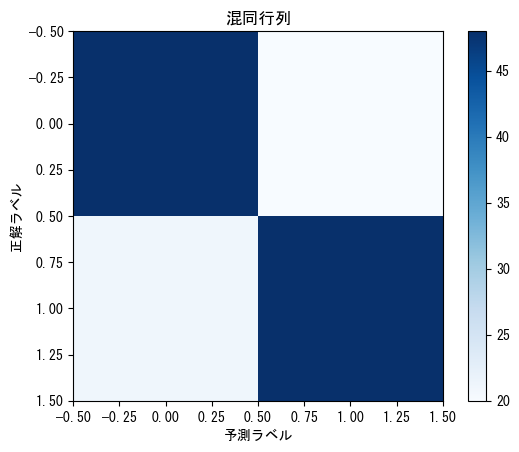

適合率： 0.7058823529411765
再現率： 0.6956521739130435
F値： 0.7007299270072993


In [6]:
import torch  # PyTorch本体
import torch.nn.functional as F  # 活性化関数など
from sklearn.metrics import confusion_matrix  # 混同行列計算用
import matplotlib.pyplot as plt  # 結果をグラフ化するため（任意）
import matplotlib
# 日本語を表示できるフォントに設定（Windowsなら例として'MS Gothic'）
matplotlib.rcParams['font.family'] = 'MS Gothic'  

model.eval()  # 評価モードに切り替え（学習時とは違い勾配計算しない設定）

all_preds = []  # 予測結果をためるリスト
all_labels = []  # 正解ラベルをためるリスト

with torch.no_grad():  # 勾配計算を止めて計算を軽くする
    for inputs, labels in val_loader:  # 検証用データをバッチで取得
        outputs = model(inputs)  # モデルに入力して予測結果を得る
        probs = F.softmax(outputs, dim=1)  # 出力を確率に変換
        preds = torch.argmax(probs, dim=1)  # 一番高い確率のクラスを選ぶ
        all_preds.extend(preds.cpu().numpy())  # CPUに戻しリストに追加
        all_labels.extend(labels.cpu().numpy())  # 正解ラベルもリストに追加

# 正解率を計算
correct = sum(p == t for p, t in zip(all_preds, all_labels))
accuracy = correct / len(all_labels)
print(f"検証データの正解率: {accuracy:.4f}")

# 混同行列を計算・表示
cm = confusion_matrix(all_labels, all_preds)
print("混同行列:")
print(cm)

# （必要なら）混同行列をグラフで表示
plt.imshow(cm, cmap='Blues')
plt.colorbar()
plt.xlabel("予測ラベル")
plt.ylabel("正解ラベル")
plt.title("混同行列")
plt.show()

# --- ここから改良例 ---
# ハイパーパラメータ調整やレイヤー追加は別途モデル定義部分で行い再学習します

# 例：学習率の変更
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

from sklearn.metrics import precision_score, recall_score, f1_score

print("適合率：", precision_score(all_labels, all_preds))
print("再現率：", recall_score(all_labels, all_preds))
print("F値：", f1_score(all_labels, all_preds))

# データ拡張例
transform = transforms.Compose([
    transforms.RandomRotation(15),
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(brightness=0.2, contrast=0.2),
    transforms.ToTensor(),
])

# ハイパーパラメータ変更例
optimizer = optim.Adam(model.parameters(), lr=0.0003)

# 転移学習の微調整例
# model.fc = nn.Linear(in_features, num_classes)  # 最終層を置き換え
# 再び訓練ループで最適化
